In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from mdct import MDCT
from window import HanningWindow, KBDWindow, SineWindow

In [8]:
# 1.f)

N = 1024
n_array = np.arange(N)
N_half = N // 2
x = np.cos(2 * np.pi * 7000 * n_array / 44100)

# sine window
x_sine_w = SineWindow(x)
fft_sine_w = scipy.fft.rfft(x_sine_w)[:-1]
# hanning window
x_hanning_w = HanningWindow(x)
fft_hanning_w = scipy.fft.rfft(x_hanning_w)[:-1]
# sine window with MDCT
mdct_sine_w = MDCT(x_sine_w, N_half, N_half)
# KBD window with MDCT
x_kbd_w = KBDWindow(x)
mdct_kbd_w = MDCT(x_kbd_w, N_half, N_half)

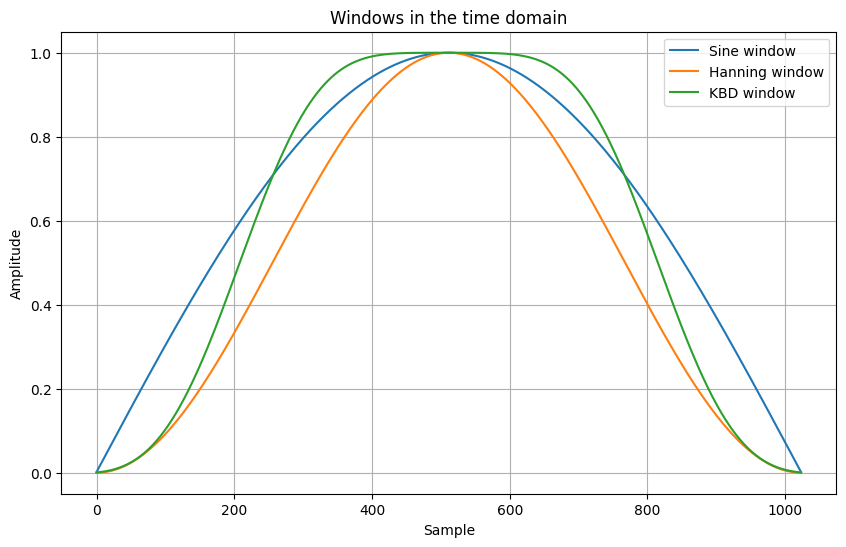

In [3]:
dummy_x = np.ones((N))

plt.figure(figsize=(10, 6))
plt.plot(n_array, SineWindow(dummy_x), label="Sine window")
plt.plot(n_array, HanningWindow(dummy_x), label="Hanning window")
plt.plot(n_array, KBDWindow(dummy_x), label="KBD window")
plt.title("Windows in the time domain")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# plt.tight_layout()
plt.show()

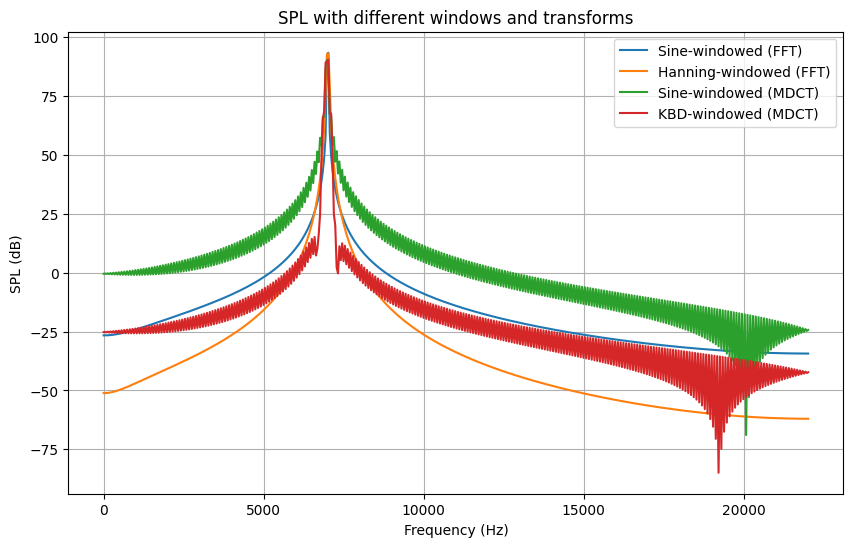

In [21]:
def SPL_fft(X, gain_window):
    N = len(X) * 2
    return 96 + 10 * np.log10(4.0 / (N * N * gain_window) * np.pow(np.abs(X), 2))


def SPL_mdct(X, gain_window):
    N = len(x) * 2
    return 96 + 10 * np.log10(2.0 / (gain_window) * np.pow(np.abs(X), 2))


def get_KBD_window_gain(N, alpha=4.0):
    dummy_x = np.ones(N)
    w_kbd = KBDWindow(dummy_x, alpha)
    return np.sum(w_kbd * w_kbd) / N


n_half_array = np.arange(N_half)
freq_array = n_half_array / N_half * 22050
plt.figure(figsize=(10, 6))
plt.plot(freq_array, SPL_fft(fft_sine_w, 1 / 2), label="Sine-windowed (FFT)")
plt.plot(freq_array, SPL_fft(fft_hanning_w, 3 / 8), label="Hanning-windowed (FFT)")
plt.plot(freq_array, SPL_mdct(mdct_sine_w, 1 / 2), label="Sine-windowed (MDCT)")
plt.plot(
    freq_array,
    SPL_mdct(mdct_kbd_w, get_KBD_window_gain(N)),
    label="KBD-windowed (MDCT)",
)
plt.title("SPL with different windows and transforms")
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.grid()
plt.legend()

# plt.tight_layout()
plt.show()